## Quebec, February Mean SWE

Geotif outputs from the [Snow Sensor Usability Maps Google Earth Engine script](https://code.earthengine.google.com/?scriptPath=users%2Fspestana%2Fssum%3Amain) ran over Quebec, Canada for 2002 to 2018. The SWE and vegetation layers (TCC and LAI) for several output files are plotted below.

In [1]:
import xarray as xr
import rioxarray
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def cdf(data):
    # compute cdf values for a 1D array of data
    data = data[~np.isnan(data)] # remove any NaN values
    x = np.sort(data) #sort data
    y = 1. * np.arange(len(data)) / (len(data) - 1) #calculate CDF values
    return x, y

In [4]:
base_filepath = 'C:/Users/steve/OneDrive/Documents/School Stuff/UW/Mountain Hydrology Research Group/Snow Sensor Usability Paper - Passive Microwave/sensitivity_test_results/ssum_output/'

### Noah MP GDAS
band 0 = MODIS LST; band 1 = Hansen et al., TCC; band 2 = NoahMP GDAS SWE; band 3 = classes

In [5]:
ds = xr.open_rasterio(base_filepath + 'quebec_ssum_noahmp_gdas_150_tcc_20-30.tif')
gdas = ds.isel(band=2)

# compute NoahMP GDAS CDF
gdas_cdf_x, gdas_cdf_y = cdf(gdas.values.ravel())
# convert to a pandas dataframe
gdas_cdf_df = pd.DataFrame(data={'cdf_x': gdas_cdf_x, 'cdf_y': gdas_cdf_y})
# export CDF values to a csv file
gdas_cdf_df.to_csv('quebec_swe_noahmp_gdas_febmean_mm_CDF.csv')

### Noah MP ECMWF & TCC
band 0 = MODIS LST; band 1 = Hansen et al., TCC; band 2 = NoahMP ECMWF SWE; band 3 = classes

In [6]:
ds = xr.open_rasterio(base_filepath + 'quebec_ssum_noahmp_ecmwf_150_tcc_20-30.tif')
ecmwf = ds.isel(band=2)
tcc = ds.isel(band=1)

# compute NoahMP ECMWF CDF
ecmwf_cdf_x, ecmwf_cdf_y = cdf(ecmwf.values.ravel())
# convert to a pandas dataframe
ecmwf_cdf_df = pd.DataFrame(data={'cdf_x': ecmwf_cdf_x, 'cdf_y': ecmwf_cdf_y})
# export CDF values to a csv file
ecmwf_cdf_df.to_csv('quebec_swe_noahmp_ecmwf_febmean_mm_CDF.csv')

# compute TCC CDF
tcc_cdf_x, tcc_cdf_y = cdf(tcc.values.ravel())
# convert to a pandas dataframe
tcc_cdf_df = pd.DataFrame(data={'cdf_x': tcc_cdf_x, 'cdf_y': tcc_cdf_y})
# export CDF values to a csv file
tcc_cdf_df.to_csv('quebec_tcc_CDF.csv')

### GlobSnow & LAI
band 0 = MODIS LST; band 1 = MODIS LAI; band 2 = GlobSnow SWE; band 3 = classes

In [7]:
ds = xr.open_rasterio(base_filepath + 'quebec_ssum_globsnow_150_lai_18-38.tif')
globsnow = ds.isel(band=2)
lai = ds.isel(band=1)

# compute GlobSnow CDF
globsnow_cdf_x, globsnow_cdf_y = cdf(globsnow.values.ravel())
# convert to a pandas dataframe
globsnow_cdf_df = pd.DataFrame(data={'cdf_x': globsnow_cdf_x, 'cdf_y': globsnow_cdf_y})
# export CDF values to a csv file
globsnow_cdf_df.to_csv('quebec_swe_globsnow_febmean_mm_CDF.csv')

# compute LAI CDF
lai_cdf_x, lai_cdf_y = cdf(lai.values.ravel())
# convert to a pandas dataframe
lai_cdf_df = pd.DataFrame(data={'cdf_x': lai_cdf_x, 'cdf_y': lai_cdf_y})
# export CDF values to a csv file
lai_cdf_df.to_csv('quebec_lai_CDF.csv')

---

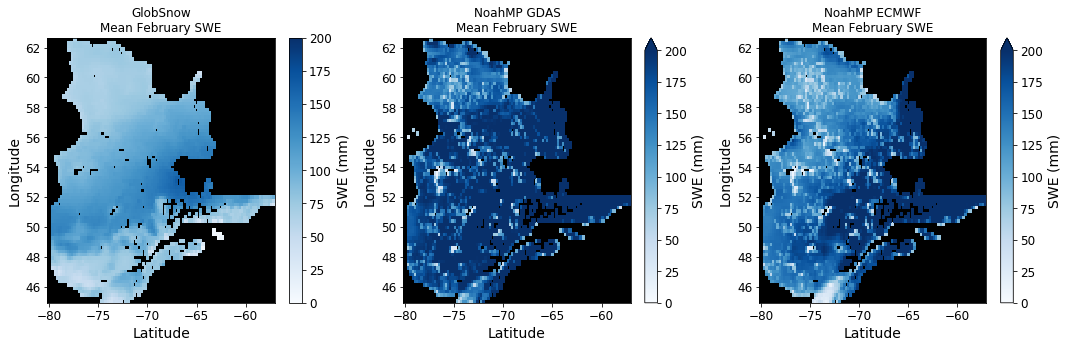

In [8]:
### Map plots ###
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True,gridspec_kw={'width_ratios': [1, 1, 1]})
[ax1, ax2, ax3] = ax.ravel()

globsnow.plot(ax=ax1, vmin=0, vmax=200, cmap='Blues', cbar_kwargs={'label': 'SWE (mm)'})

# NoahMP GDAS map
gdas.plot(ax=ax2, vmin=0, vmax=200, cmap='Blues', cbar_kwargs={'label': 'SWE (mm)'})

# NoahMP ECMWF map
ecmwf.plot(ax=ax3, vmin=0, vmax=200, cmap='Blues', cbar_kwargs={'label': 'SWE (mm)'})

# format map plots
ax1.set_title('GlobSnow\nMean February SWE')
ax2.set_title('NoahMP GDAS\nMean February SWE')
ax3.set_title('NoahMP ECMWF\nMean February SWE')

for this_ax in ax:
    this_ax.set_ylabel('Longitude')
    this_ax.set_xlabel('Latitude')
    this_ax.set_facecolor("black")

# save figure
plt.savefig('quebec-swe-maps-mountainsmasked.jpg')

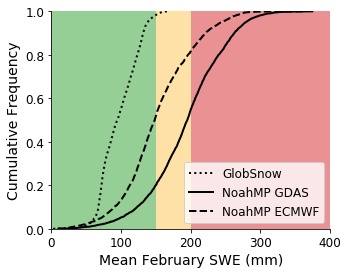

In [13]:
### CDF plot ###
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4),tight_layout=False)

# GlobSnow CDF
ax.plot(globsnow_cdf_x, globsnow_cdf_y, ':', c='k', lw=2, label='GlobSnow')

# NoahMP GDAS CDF
ax.plot(gdas_cdf_x, gdas_cdf_y, '-', c='k', lw=2,  label='NoahMP GDAS')

# NoahMP ECMWF CDF
ax.plot(ecmwf_cdf_x, ecmwf_cdf_y, '--', c='k', lw=2,  label='NoahMP ECMWF')

# add vertical lines for max SWE thresholds
#ax.axvline(150, c='grey', lw=1, zorder=-99)
#ax.axvline(200, c='grey', lw=1, zorder=-99)
ax.fill_between([0, 150], y1=1, y2=0, facecolor='tab:green', alpha=0.5)
ax.fill_between([150,200], y1=1, y2=0, facecolor='#fec44f', alpha=0.5)
ax.fill_between([200, 400], y1=1, y2=0, facecolor='tab:red', alpha=0.5)

# format CDF plot
ax.set_xlim((0,400))
ax.set_ylim((0,1))
#ax.set_title('CDF of Mean February SWE')
ax.set_ylabel('Cumulative Frequency')
ax.set_xlabel('Mean February SWE (mm)')
ax.legend(loc='lower right');




ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


# save figure
plt.savefig('quebec-swe-cdfs-mountainsmasked-v2.jpg')

---

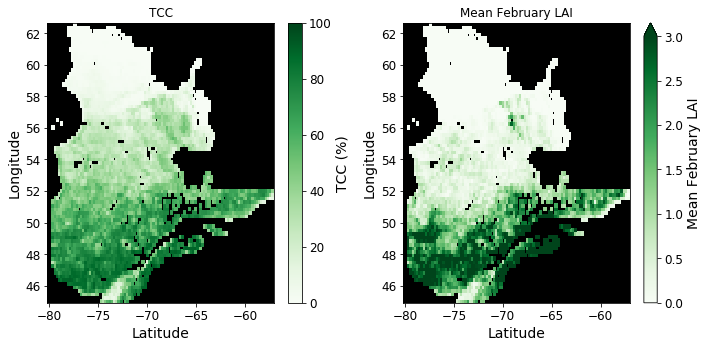

In [10]:
### Map plots ###
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),tight_layout=True,gridspec_kw={'width_ratios': [1, 1]})
[ax1, ax2] = ax.ravel()

# TCC map
tcc.plot(ax=ax1, vmin=0, vmax=100, cmap='Greens', cbar_kwargs={'label': 'TCC (%)'})

# LAI map
lai.plot(ax=ax2, vmin=0, vmax=3, cmap='Greens', cbar_kwargs={'label': 'Mean February LAI'})


# format map plots
ax1.set_title('TCC')
ax2.set_title('Mean February LAI')

for this_ax in ax:
    #this_ax.set_ylim(24,72)
    this_ax.set_ylabel('Longitude')
    this_ax.set_xlabel('Latitude')
    this_ax.set_facecolor("black")

# save figure
plt.savefig('quebec-forest-maps-mountainsmasked.jpg')

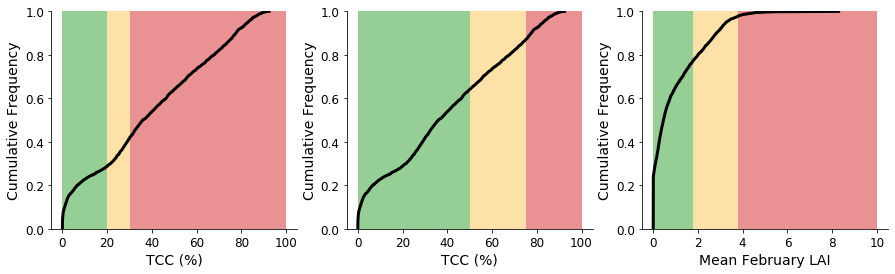

In [11]:
### CDF plot ###
fig, [ax0, ax, ax2] = plt.subplots(nrows=1,ncols=3,figsize=(15,4),tight_layout=False)

#ax2 = ax.twiny() # make second x axis

# TCC CDF #1
ax0.plot(tcc_cdf_x, tcc_cdf_y, '-', lw=3, c='k', label='TCC', zorder=999)
# add vertical lines for TCC thresholds
#ax.axvline(20, c='grey', linestyle='-', lw=1, zorder=-99)
#ax.axvline(50, c='grey', linestyle='-', lw=1, zorder=-99)
#ax.axvline(30, c='grey', linestyle='--', lw=1, zorder=-99)
#ax.axvline(75, c='grey', linestyle='--', lw=1, zorder=-99)
#ax.fill_between([20, 50], y1=1, y2=0, hatch='\\\\', edgecolor='#fec44f', facecolor='none', zorder=99)
ax0.fill_between([20, 30], y1=1, y2=0, facecolor='#fec44f', alpha=0.5)
#ax.fill_between([30, 75], y1=1, y2=0, hatch='//', edgecolor='#fec44f', facecolor='none', zorder=99)
ax0.fill_between([0, 20], y1=1, y2=0, facecolor='tab:green', alpha=0.5)
ax0.fill_between([30, 100], y1=1, y2=0, facecolor='tab:red', alpha=0.5)

# TCC CDF #2
ax.plot(tcc_cdf_x, tcc_cdf_y, '-', lw=3, c='k', label='TCC', zorder=999)
# add vertical lines for TCC thresholds
#ax.axvline(20, c='grey', linestyle='-', lw=1, zorder=-99)
#ax.axvline(50, c='grey', linestyle='-', lw=1, zorder=-99)
#ax.axvline(30, c='grey', linestyle='--', lw=1, zorder=-99)
#ax.axvline(75, c='grey', linestyle='--', lw=1, zorder=-99)
#ax.fill_between([20, 50], y1=1, y2=0, hatch='\\\\', edgecolor='#fec44f', facecolor='none', zorder=99)
ax.fill_between([50, 75], y1=1, y2=0, facecolor='#fec44f', alpha=0.5)
#ax.fill_between([30, 75], y1=1, y2=0, hatch='//', edgecolor='#fec44f', facecolor='none', zorder=99)
ax.fill_between([0, 50], y1=1, y2=0, facecolor='tab:green', alpha=0.5)
ax.fill_between([75, 100], y1=1, y2=0, facecolor='tab:red', alpha=0.5)

# LAI CDF
ax2.plot(lai_cdf_x, lai_cdf_y, '-', lw=3, c='k', label='MODIS LAI', zorder=999)
# add vertical lines for LAI thresholds
#ax2.axvline(1.8, c='grey', lw=1, zorder=-99)
#ax2.axvline(3.8, c='grey', lw=1, zorder=-99)
#ax2.fill_between([1.8, 3.8], y1=1, y2=0, hatch='\\\\', edgecolor='#fec44f', facecolor='none')
ax2.fill_between([1.8,3.8], y1=1, y2=0, facecolor='#fec44f', alpha=0.5)
ax2.fill_between([0, 1.8], y1=1, y2=0, facecolor='tab:green', alpha=0.5)
ax2.fill_between([3.8, 10], y1=1, y2=0, facecolor='tab:red', alpha=0.5)
# format CDF plot
#ax.set_xlim((-5,100))
#fig.suptitle('CDFs of TCC and LAI')
ax.set_ylabel('Cumulative Frequency')
ax2.set_ylabel('Cumulative Frequency')
ax0.set_ylabel('Cumulative Frequency')
ax0.set_xlabel('TCC (%)')
ax.set_xlabel('TCC (%)')
ax2.set_xlabel('Mean February LAI')
ax0.set_ylim(0,1)
ax.set_ylim(0,1)
ax2.set_ylim(0,1)
#ax.legend(loc=(.75,.25), frameon=False);
#ax2.legend(loc=(.75,.18), frameon=False);

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# save figure
plt.savefig('quebec-forest-cdfs-mountainsmasked-v2.jpg')

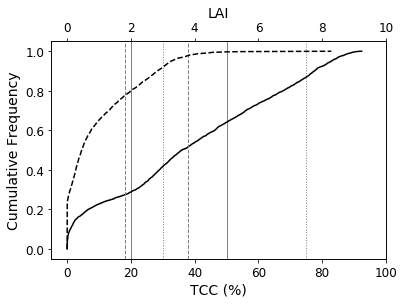

In [12]:
### CDF plot ###
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4),tight_layout=False)

#ax2 = ax.twiny() # make second x axis

# TCC CDF
ax.plot(tcc_cdf_x, tcc_cdf_y, '-', c='k', label='TCC')
# add vertical lines for TCC thresholds
ax.axvline(20, c='grey', linestyle='-', lw=1, zorder=-99)
ax.axvline(30, c='grey', linestyle=':', lw=1, zorder=-99)
ax.axvline(50, c='grey', linestyle='-', lw=1, zorder=-99)
ax.axvline(75, c='grey', linestyle=':', lw=1, zorder=-99)

ax2 = ax.twiny()
# LAI CDF
ax2.plot(lai_cdf_x, lai_cdf_y, '--', c='k', label='MODIS LAI')
# add vertical lines for LAI thresholds
ax2.axvline(1.8, c='grey', lw=1, linestyle='--', zorder=-99)
ax2.axvline(3.8, c='grey', lw=1, linestyle='--', zorder=-99)
# format CDF plot
ax.set_xlim((-5,100))
#fig.suptitle('CDFs of TCC and LAI')
ax.set_ylabel('Cumulative Frequency')
ax.set_xlabel('TCC (%)')
ax2.set_xlabel('LAI')
ax2.set_xlim((-.5,10))
#ax.legend(loc=(.75,.25), frameon=False);
#ax2.legend(loc=(.75,.18), frameon=False);

# save figure
plt.savefig('quebec-forest-cdfs-mountainsmasked-combined.jpg')